In [61]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#import lightgbm as lgb #Microsoft ML Kütüphanesi

from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve, accuracy_score


In [62]:
df = pd.read_csv('heart.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [64]:
df.shape

(918, 12)

In [65]:
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [66]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Görselleştirme

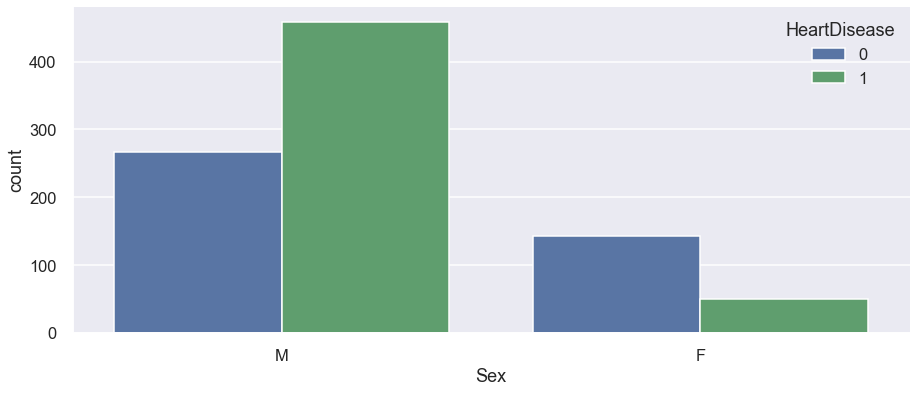

In [67]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x="Sex", hue="HeartDisease")
sns.despine(top=True,right=True)

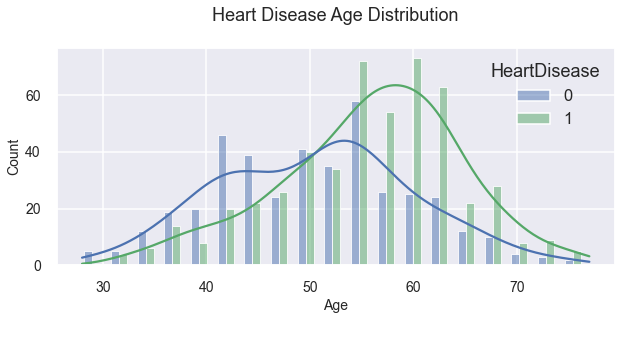

In [68]:
for col in ['Age']:
    plt.figure(figsize=(10,4))
    plt.title(f'Heart Disease {col} Distribution\n', fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(f'{col}\n\n', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    sns.histplot(data=df, x=col, hue='HeartDisease',multiple='dodge', shrink=0.6, kde=True)

Sex
F    21.023965
M    78.976035
Name: Age, dtype: float64


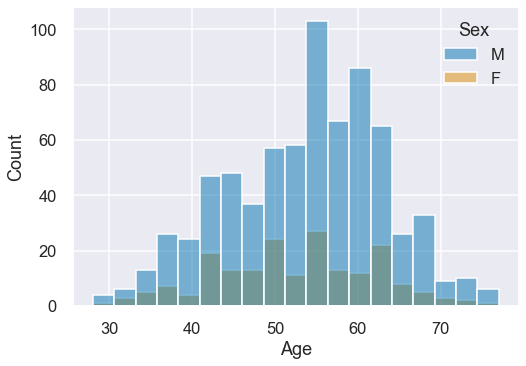

In [69]:
sns.histplot(x="Age",hue="Sex",data=df,palette="colorblind")
print(df.groupby("Sex")["Age"].count()*(100/len(df)))

Sex
F     9.84252
M    90.15748
Name: Age, dtype: float64


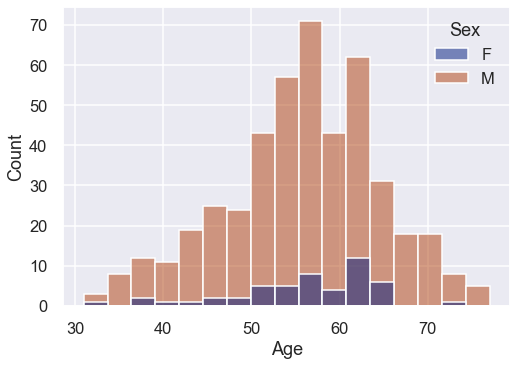

In [70]:
sns.histplot(x="Age",hue="Sex",data=df[df["HeartDisease"]==1],palette="dark")
print(df[df["HeartDisease"]==1].groupby("Sex")["Age"].count()*(100/len(df[df["HeartDisease"]==1])))

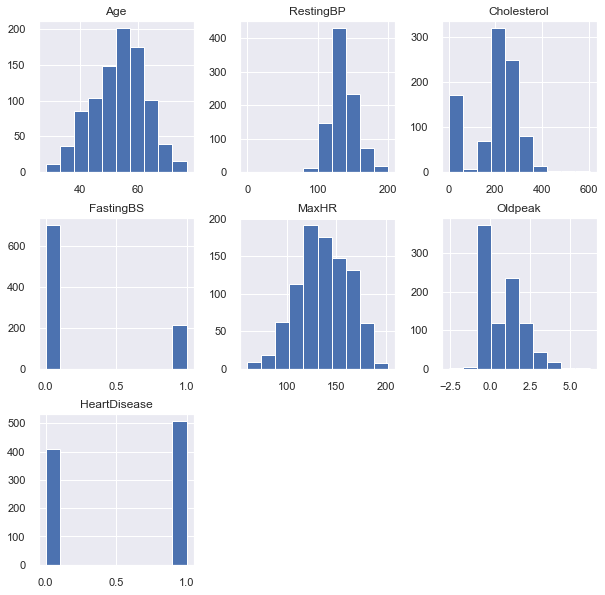

In [71]:
sns.set()
df.hist(figsize=(10,10))
plt.show()

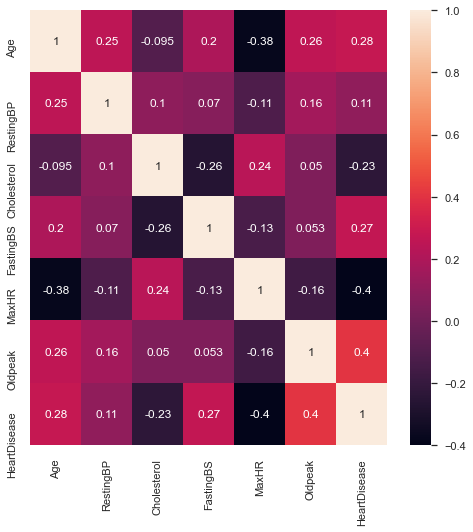

In [72]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

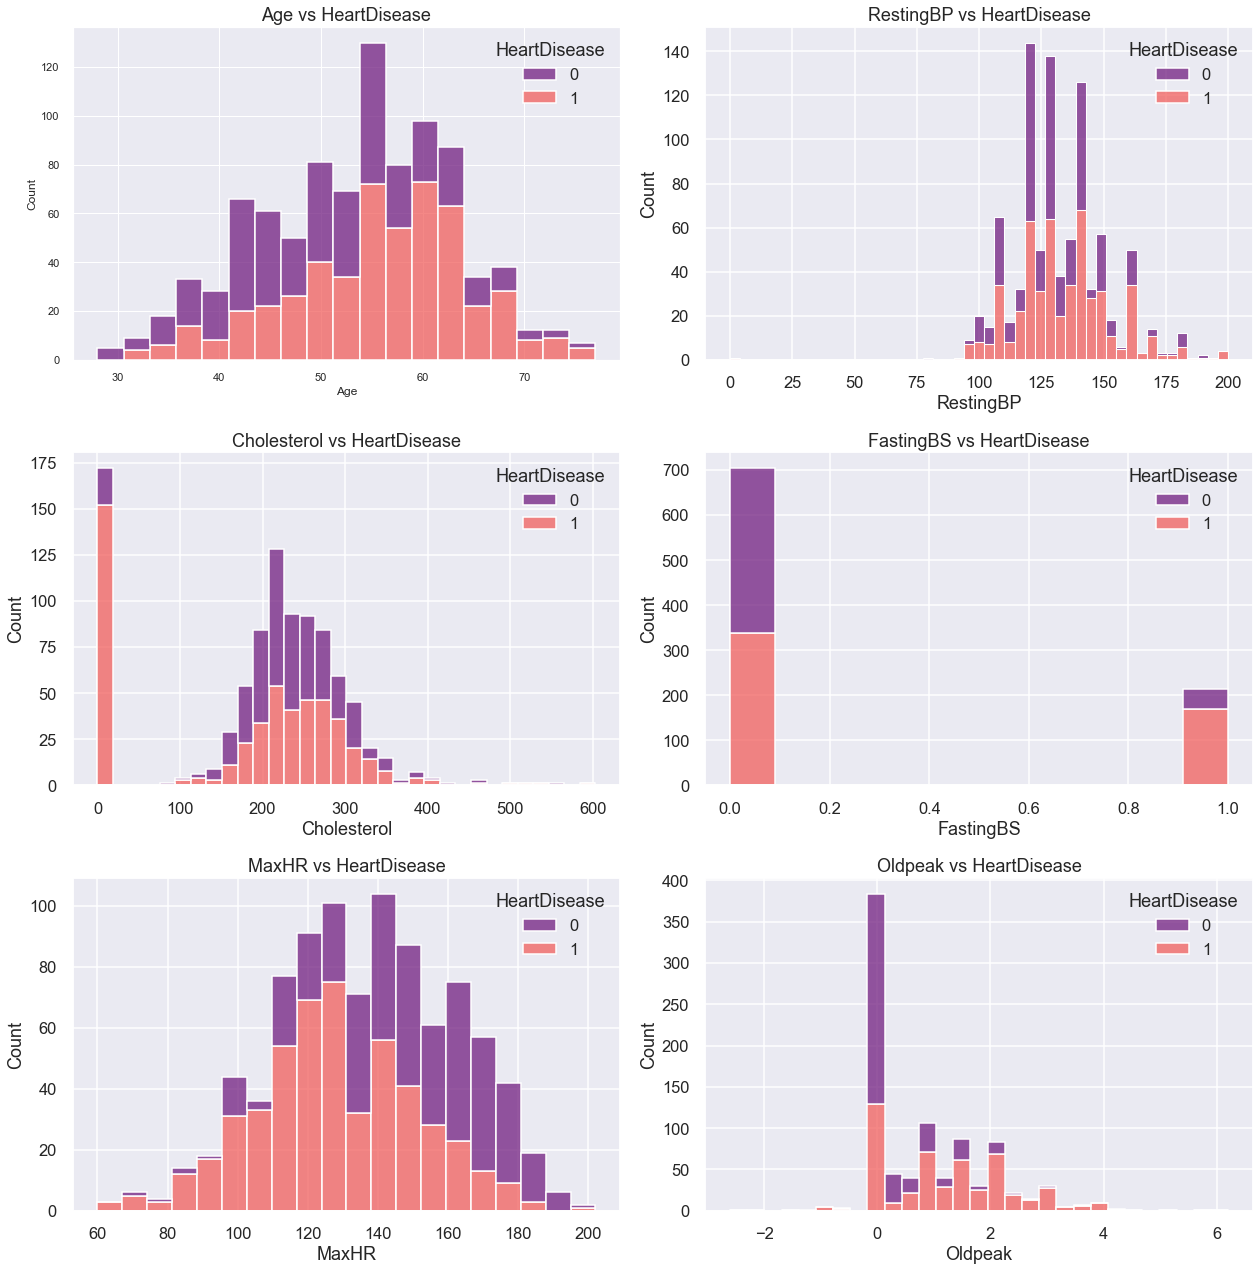

In [73]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

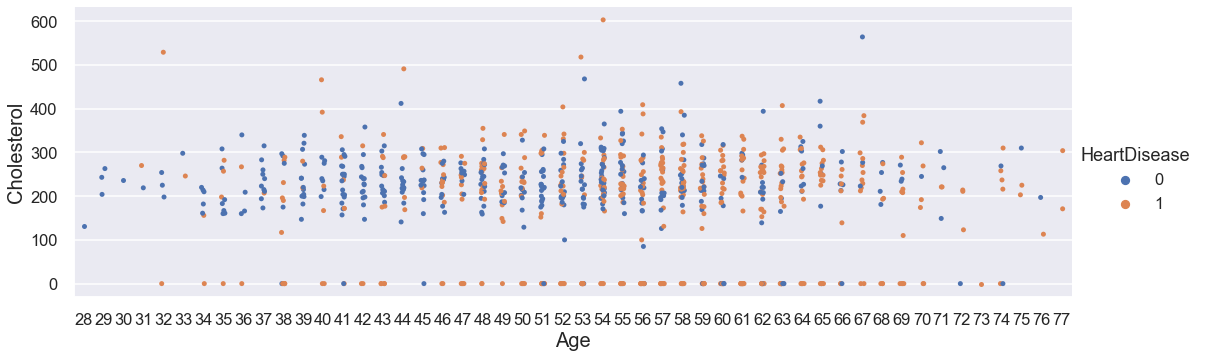

In [74]:
sns.catplot(x="Age",y="Cholesterol",hue="HeartDisease",data=df,aspect=3,palette="deep")
plt.xlabel("Age",fontsize=20)
plt.ylabel("Cholesterol",fontsize=20)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Oldpeak'>

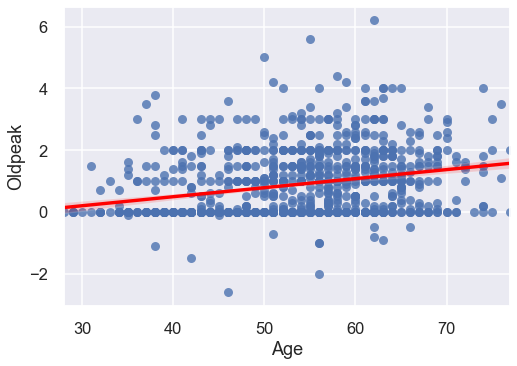

In [75]:
sns.regplot(x="Age",y="Oldpeak",data=df, line_kws={"color": "red"})

<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

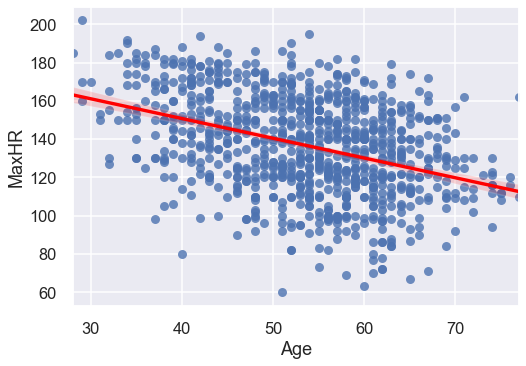

In [76]:
sns.regplot(x="Age",y="MaxHR",data=df, line_kws={"color": "red"})

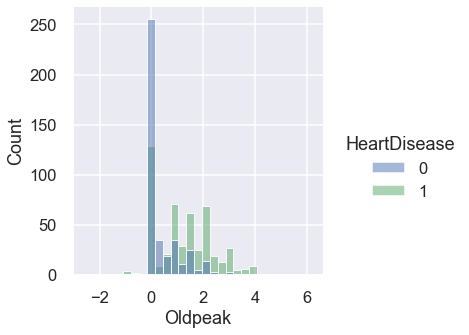

In [77]:
sns.displot(x="Oldpeak",data=df,hue="HeartDisease")

#  Pre-processing: Feature selection/extraction


In [78]:
CPT_oh = pd.get_dummies(df["ChestPainType"])
Sex_oh = pd.get_dummies(df["Sex"])
Ex_oh = pd.get_dummies(df["ExerciseAngina"])
ST_oh = pd.get_dummies(df["ST_Slope"])
rest_oh = pd.get_dummies(df["RestingECG"])

In [79]:
df.drop(["ChestPainType","Sex","RestingECG","ExerciseAngina","ST_Slope"],axis=1,inplace=True)

In [80]:
df = pd.concat([df,CPT_oh,Sex_oh,ST_oh,Ex_oh,rest_oh],axis=1)

In [81]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,...,F,M,Down,Flat,Up,N,Y,LVH,Normal,ST
0,40,140,289,0,172,0.0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,0,1,...,0,1,0,0,1,1,0,0,1,0


In [82]:
X = df.drop(["HeartDisease"],axis=1)
y = df["HeartDisease"]

In [83]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[-1.4331398 ,  0.41090889,  0.82507026, -0.55134134,  1.38292822,
        -0.83243239, -1.08413811,  2.07517671, -0.53283777, -0.22967867,
        -0.51595242,  0.51595242, -0.27144836, -1.00218103,  1.15067399,
         0.8235563 , -0.8235563 , -0.50747832,  0.81427482, -0.49044933],
       [-0.47848359,  1.49175234, -0.17196105, -0.55134134,  0.75415714,
         0.10566353, -1.08413811, -0.48188667,  1.87674385, -0.22967867,
         1.93816322, -1.93816322, -0.27144836,  0.99782372, -0.86905588,
         0.8235563 , -0.8235563 , -0.50747832,  0.81427482, -0.49044933],
       [-1.75135854, -0.12951283,  0.7701878 , -0.55134134, -1.52513802,
        -0.83243239, -1.08413811,  2.07517671, -0.53283777, -0.22967867,
        -0.51595242,  0.51595242, -0.27144836, -1.00218103,  1.15067399,
         0.8235563 , -0.8235563 , -0.50747832, -1.22808661,  2.03894663]])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,random_state=42)

In [85]:
models_accuracy_scores = {}

# Model

In [86]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [88]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv=10) 
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [89]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8633205456095482


In [90]:
y_hat = logreg_cv.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



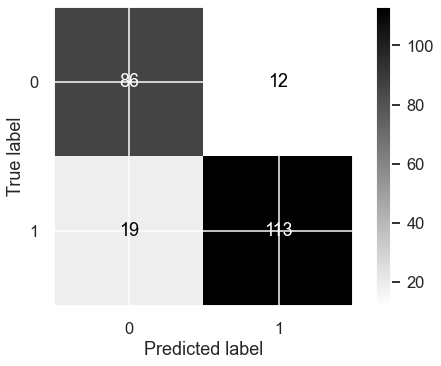

In [91]:
print(classification_report(y_test,y_hat))
plot_confusion_matrix(logreg_cv, X_test, y_test,cmap="binary") 

In [92]:
logreg_f1 = f1_score(y_test,y_hat,average="weighted")
logreg_accuracy = logreg_cv.score(X_test,y_test)
logreg_recall = recall_score(y_test,y_hat,average="binary")
models_accuracy_scores["Logistic Regression"] = [logreg_f1,logreg_accuracy,logreg_recall]

# KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    kNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=kNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.80869565, 0.78695652, 0.84782609, 0.83913043, 0.86521739,
       0.84347826, 0.86086957, 0.85652174, 0.86521739, 0.85652174,
       0.86521739, 0.87391304, 0.87391304, 0.86521739, 0.86956522,
       0.86956522, 0.87391304, 0.86521739, 0.8826087 , 0.8826087 ,
       0.8826087 , 0.87391304, 0.87826087, 0.87826087, 0.86956522,
       0.87826087, 0.87391304, 0.86521739, 0.86956522, 0.86956522,
       0.86956522, 0.87391304, 0.87826087, 0.86956522, 0.87391304,
       0.86086957, 0.86086957, 0.86086957, 0.86086957])

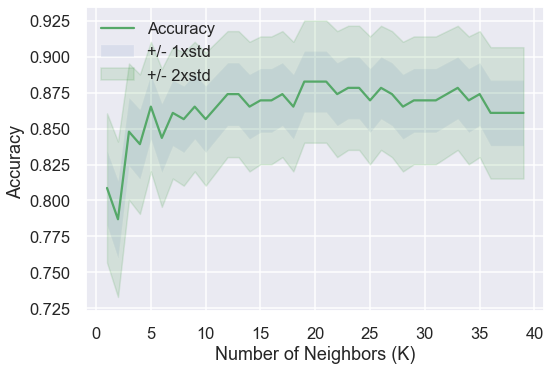

In [94]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 2 * std_acc,mean_acc + 2 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 2xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [95]:
kNN = KNeighborsClassifier().fit(X_train,y_train)
y_hat = kNN.predict(X_test)
print(kNN.score(X_test,y_test))
print(metrics.accuracy_score(y_test, yhat))

0.8652173913043478
0.8608695652173913


              precision    recall  f1-score   support

           0       0.81      0.89      0.85        98
           1       0.91      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



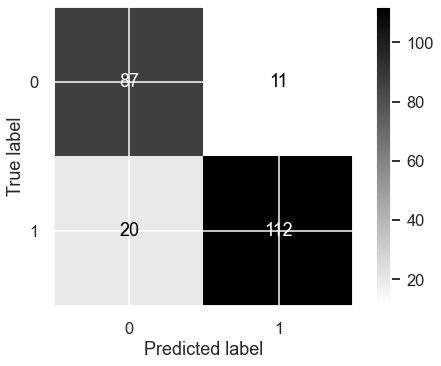

In [96]:
kNN = KNeighborsClassifier().fit(X_train,y_train)
y_hat = kNN.predict(X_test)
print(classification_report(y_test,y_hat))
plot_confusion_matrix(kNN, X_test, y_test,cmap="binary") 

In [97]:
kNN_f1 = f1_score(y_test,y_hat,average="weighted")
kNN_accuracy = kNN.score(X_test,y_test)
kNN_recall = recall_score(y_test,y_hat,average="binary")
models_accuracy_scores["K-Nearest Neighbors"] = [kNN_f1,kNN_accuracy,kNN_recall]

# Decision Tree

In [98]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [99]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [100]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
print(metrics.accuracy_score(y_test, yhat))

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8647271952259163
0.8608695652173913


              precision    recall  f1-score   support

           0       0.78      0.83      0.80        98
           1       0.87      0.83      0.84       132

    accuracy                           0.83       230
   macro avg       0.82      0.83      0.82       230
weighted avg       0.83      0.83      0.83       230



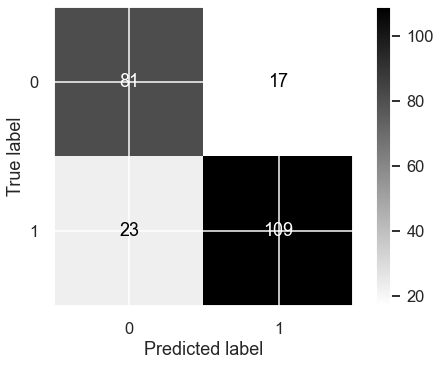

In [101]:
y_hat = tree_cv.predict(X_test)
print(classification_report(y_test,y_hat))
plot_confusion_matrix(tree_cv, X_test, y_test,cmap="binary") 

In [102]:
tree_f1 = f1_score(y_test,y_hat,average="weighted")
tree_accuracy = tree_cv.score(X_test,y_test)
tree_recall = recall_score(y_test,y_hat,average="binary")
models_accuracy_scores["Decision Tree Classifier"] = [tree_f1,tree_accuracy,tree_recall]

# Random Forest

In [103]:
rfc=RandomForestClassifier(n_estimators=400,random_state = 0,max_features='sqrt',n_jobs=-1)
rfc.fit(X_train,y_train)
y_pred_test = rfc.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8869565217391304

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        98
           1       0.92      0.88      0.90       132

    accuracy                           0.89       230
   macro avg       0.88      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



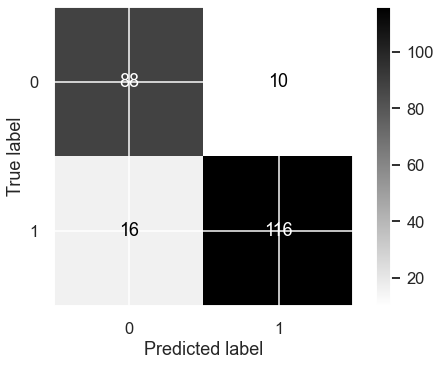

In [104]:
y_hat = rfc.predict(X_test)
print(classification_report(y_test,y_hat))
plot_confusion_matrix(rfc, X_test, y_test,cmap="binary") 

In [105]:
rfc_f1 = f1_score(y_test,y_hat,average="weighted")
rfc_accuracy = rfc.score(X_test,y_test)
rfc_recall = recall_score(y_test,y_hat,average="binary")
models_accuracy_scores["Random Forest Classifier"] = [rfc_f1,rfc_accuracy,rfc_recall]

# Evaluation Part

In [106]:
names = ["Accuracy", 'F1-Score', 'Recall']
df_scores = pd.DataFrame(models_accuracy_scores.values(),columns = names,index=models_accuracy_scores.keys())

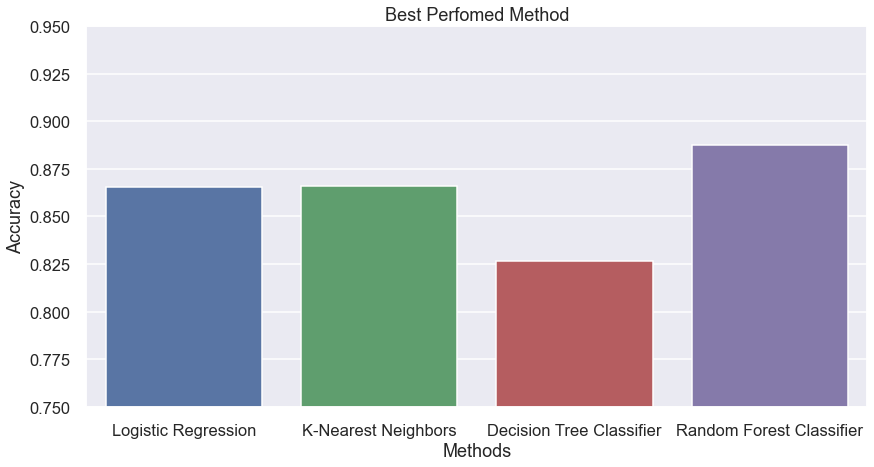

In [107]:
fig = plt.figure(figsize = (14, 7))
sns.barplot(y=df_scores["Accuracy"],x=df_scores.index,)
plt.ylim((0.75,0.95))
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()

In [108]:
df_scores

,Accuracy,F1-Score,Recall
Logistic Regression,0.865706,0.865217,0.856061
K-Nearest Neighbors,0.865798,0.865217,0.848485
Decision Tree Classifier,0.826648,0.826087,0.825758
Random Forest Classifier,0.887321,0.886957,0.878788


In [109]:
df_scores[df_scores["Accuracy"]==max(df_scores["Accuracy"])]

,Accuracy,F1-Score,Recall
Random Forest Classifier,0.887321,0.886957,0.878788
